<table>
  <tr>
    <td style="width: 60%; vertical-align: top; font-size: 14px; line-height: 1.6;">
      <h2 style="margin-top: 0;">Cybersecurity Threats Analysis 2015–2024</h2>
      <p><strong>Goal:</strong> Identify key trends, risks, and patterns in global cyberattacks from 2015 to 2024.</p>
      <p><strong>Main questions:</strong></p>
      <ul>
        <li>Which attack types are increasing over time?</li>
        <li>Which industries lose the most money?</li>
        <li>What sources are behind the attacks?</li>
        <li>Which defense methods reduce resolution time?</li>
      </ul>
      </ul>
      <p><strong>Attack Type Overview:</strong></p>
      <ul>
        <li><strong>Phishing:</strong> Deceptive emails trick users into revealing credentials.</li>
        <li><strong>Ransomware:</strong> Encrypts systems and demands payment for restoration.</li>
        <li><strong>DDoS:</strong> Overloads systems with traffic, causing service outages.</li>
        <li><strong>Man-in-the-Middle:</strong> Intercepts communication between users and systems.</li>
        <li><strong>Credential Stuffing:</strong> Reuses leaked passwords to access accounts.</li>
        <li><strong>Insider Threat:</strong> Employees or contractors misuse access.</li>
      </ul>
    </td>
    <td style="width: 70%; text-align: right;">
      <img src="cyber_threats_intro.png" width="1800">
    </td>
  </tr>
</table>


### Each row represents a single attack event.

* Country: the country where the incident occurred

* Year: the year when the attack took place

* Attack Type: the method used by the attackers, such as phishing, ransomware, or DDoS

* Target Industry: the sector targeted, including healthcare, banking, government, and others 

* Financial Loss (in Million $): the estimated financial damage caused by the attack

* Number of Affected Users: the number of individuals or user accounts impacted

* Attack Source: the origin of the attack, such as nation-state, hacker group, insider, or unknown

* Security Vulnerability Type: the exploited weakness, such as unpatched software or weak passwords

* Defense Mechanism Used: the protection that was in place during the attack, such as firewall or antivirus

* Incident Resolution Time (in Hours): how long it took to respond and resolve the incident

In [391]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style="whitegrid")
palette = sns.color_palette("RdPu")

### Data Source: 
https://www.kaggle.com/datasets/atharvasoundankar/global-cybersecurity-threats-2015-2024

In [2]:
df = pd.read_csv('/Users/ludmiladolontaeva/Downloads/Global_Cybersecurity_Threats_2015-2024.csv')
df.head()

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63
1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20
3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-state,Social Engineering,AI-based Detection,7
4,Germany,2018,Man-in-the-Middle,IT,74.41,810682,Insider,Social Engineering,VPN,68


## Part 1: Which attack types are increasing over time?

### 1.1 Cyberattack Composition by Year (Stacked Bar)

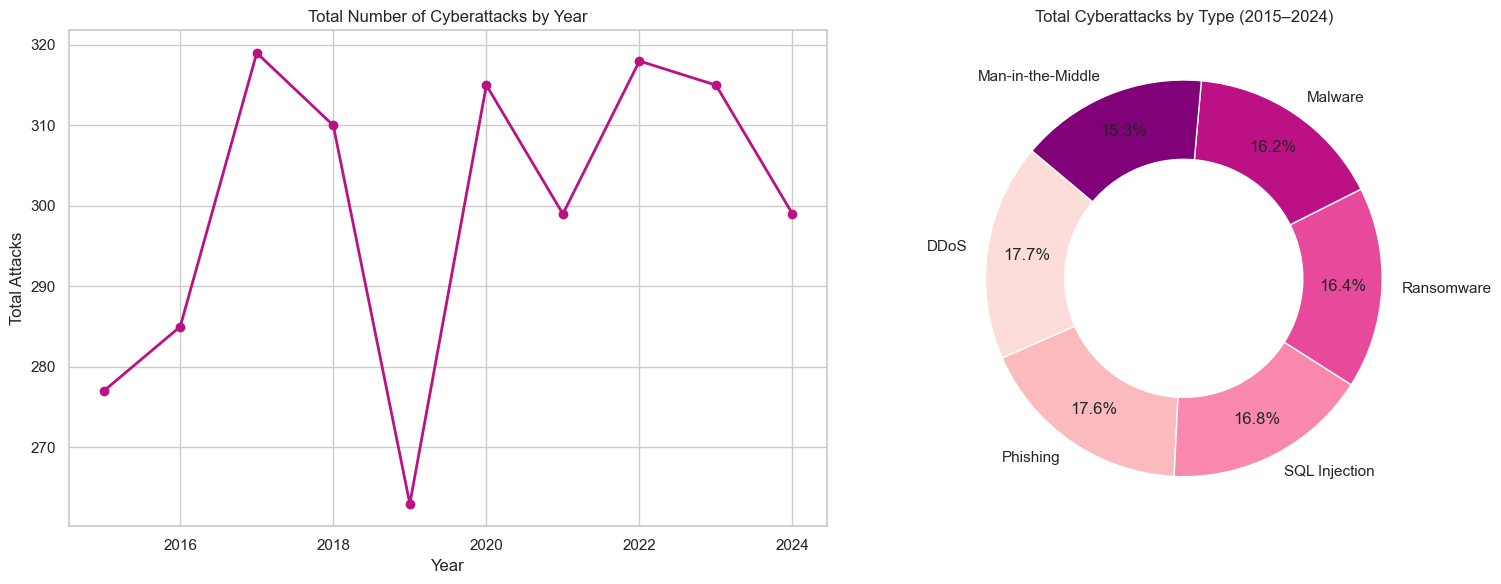

In [392]:
attack_totals = df['Attack Type'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

attack_trends = df.groupby(['Year', 'Attack Type']).size().unstack(fill_value=0)
total_attacks = attack_trends.sum(axis=1)

axes[0].plot(total_attacks.index, total_attacks.values, color=palette[4], marker='o', linewidth=2)
axes[0].set_title('Total Number of Cyberattacks by Year')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Total Attacks')
axes[0].grid(True)

axes[1].pie(
    attack_totals.values,
    labels=attack_totals.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=palette,
    wedgeprops=dict(width=0.4),
    pctdistance=0.8
)
axes[1].set_title('Total Cyberattacks by Type (2015–2024)')

plt.tight_layout()
plt.show()


**Chart 1** : Total Cyberattacks by Year (2015–2024)

Insight: Cyberattacks peaked in 2017 (320) and again in 2022 (318), showing a recurring 5-year cycle. 2024 saw a slight drop (299), but threat levels remain elevated.

Action: Expect long-term recurrence. Invest in scalable security infrastructure and monitor for buildup during pre-peak years.

**Chart 2** : Total Cyberattacks by Type (2015-2025)

Insight:
Phishing (20.5 percent) and DDoS (18.4 percent) are the most frequent attack types, together accounting for nearly 39 percent of all incidents. Man in the Middle is the least common at 13.3 percent. Attack methods are relatively evenly distributed, with no single type clearly dominating.

Action:
Maintain broad security coverage. Prioritize phishing prevention and DDoS mitigation. Strengthen database security against SQL Injection (16.9 percent) and ensure robust malware defenses (15.9 percent).

### 1.2 Defense Effectiveness Analysis: Phishing vs DDoS

Based on earlier analysis, the most prevalent attack types across 2015–2024 are DDoS and Phishing.

To evaluate which defense mechanisms are most effective against these attacks, we calculated an **effectiveness score** for each method using the formula:
          
                    Usage Count

Effectiveness Score = 
      ───────────────
    
                Avg Resolution Time (hours)


This metric reflects how often a defense mechanism is deployed and how quickly it resolves incidents.

The bar chart below compares the effectiveness of each defense method for both DDoS and Phishing attacks.  
**Higher scores = better performance** - frequent usage combined with faster resolution.


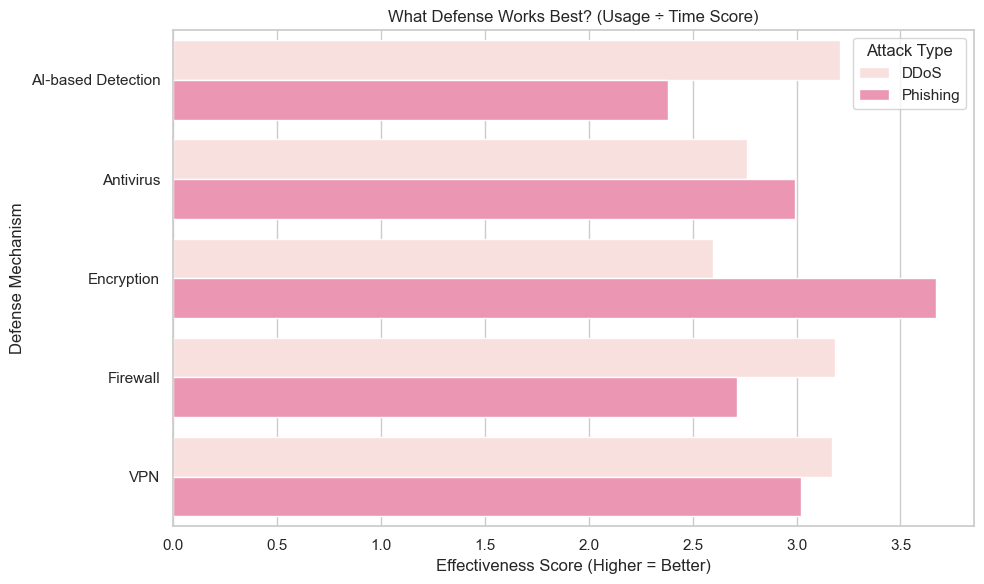

In [393]:
subset = df[df['Attack Type'].isin(['Phishing', 'DDoS'])]

summary = subset.groupby(['Defense Mechanism Used', 'Attack Type']) \
    .agg(
        Count=('Incident Resolution Time (in Hours)', 'count'),
        AvgTime=('Incident Resolution Time (in Hours)', 'mean')
    ).reset_index()

summary['Effectiveness Score'] = summary['Count'] / summary['AvgTime']

plt.figure(figsize=(10, 6))
sns.barplot(
    data=summary,
    x='Effectiveness Score',
    y='Defense Mechanism Used',
    hue='Attack Type',
    palette=[palette[0],palette[2]]
)
plt.title('What Defense Works Best? (Usage ÷ Time Score)')
plt.xlabel('Effectiveness Score (Higher = Better)')
plt.ylabel('Defense Mechanism')
plt.tight_layout()
plt.show()


Insight:
Encryption and AI-based detection are the most effective defenses overall. Encryption scores highest against phishing (3.5) while VPN and firewalls perform best against DDoS (both above 3.0). Antivirus shows only moderate effectiveness for both.

Action:
Prioritize encryption and AI-driven detection for phishing protection. For DDoS, invest in strong firewall configuration and VPN-based traffic management. Reduce reliance on antivirus as a primary defense layer.

### 1.3 Resolution Time and Frequency by Vulnerability Type

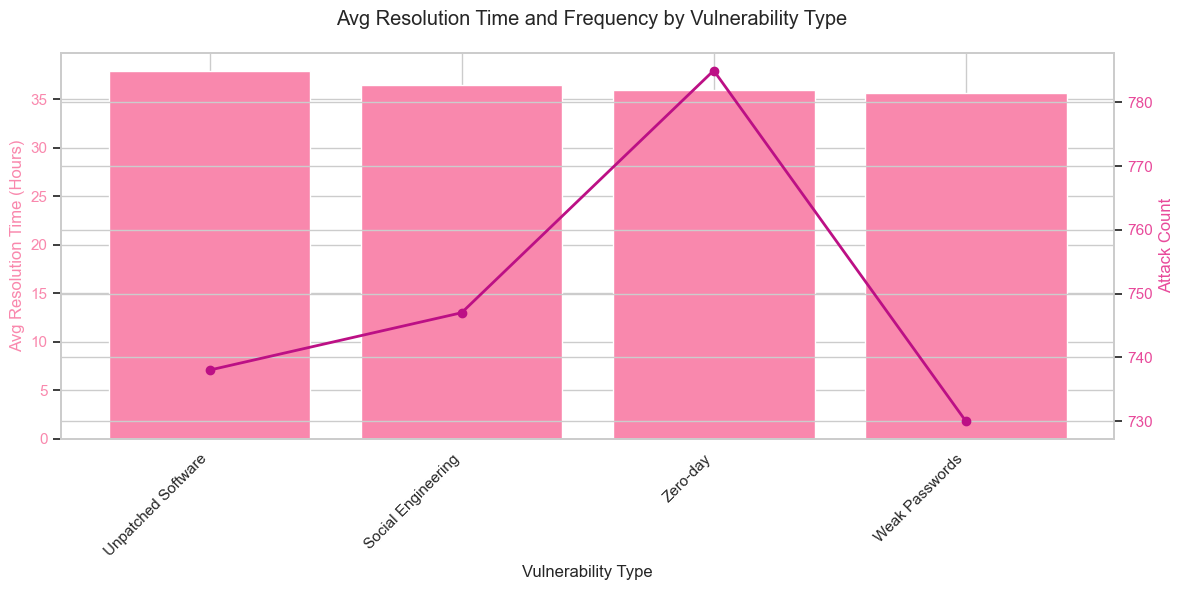

In [394]:
vuln_data = df.groupby('Security Vulnerability Type').agg({
    'Incident Resolution Time (in Hours)': 'mean',
    'Attack Type': 'count'
}).reset_index().rename(columns={
    'Incident Resolution Time (in Hours)': 'Avg Resolution Time',
    'Attack Type': 'Attack Count',
    'Security Vulnerability Type': 'Vulnerability'
})

vuln_data = vuln_data.sort_values('Avg Resolution Time', ascending=False)
x = range(len(vuln_data))

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.bar(x, vuln_data['Avg Resolution Time'], color=palette[2])
ax1.set_xlabel('Vulnerability Type')
ax1.set_ylabel('Avg Resolution Time (Hours)', color=palette[2])
ax1.tick_params(axis='y', labelcolor=palette[2])
ax1.set_xticks(x)
ax1.set_xticklabels(vuln_data['Vulnerability'], rotation=45, ha='right')

ax2 = ax1.twinx()
ax2.plot(x, vuln_data['Attack Count'], color=palette[4], marker='o', linewidth=2)
ax2.set_ylabel('Attack Count', color=palette[3])
ax2.tick_params(axis='y', labelcolor=palette[3])

fig.suptitle('Avg Resolution Time and Frequency by Vulnerability Type')
plt.tight_layout()
plt.show()


Insight:
All vulnerability types lead to high average resolution times, around 36 hours. Zero-day attacks are the most frequent (780 incidents) and still take long to resolve. Weak passwords are the least frequent (730 incidents) but also show slow response.

Action:
Speed up patching and response workflows. Prioritize zero-day detection and containment. Address weak password policies with enforced credential hygiene and access controls.

### 1.4 Attack Type Distribution by Industry

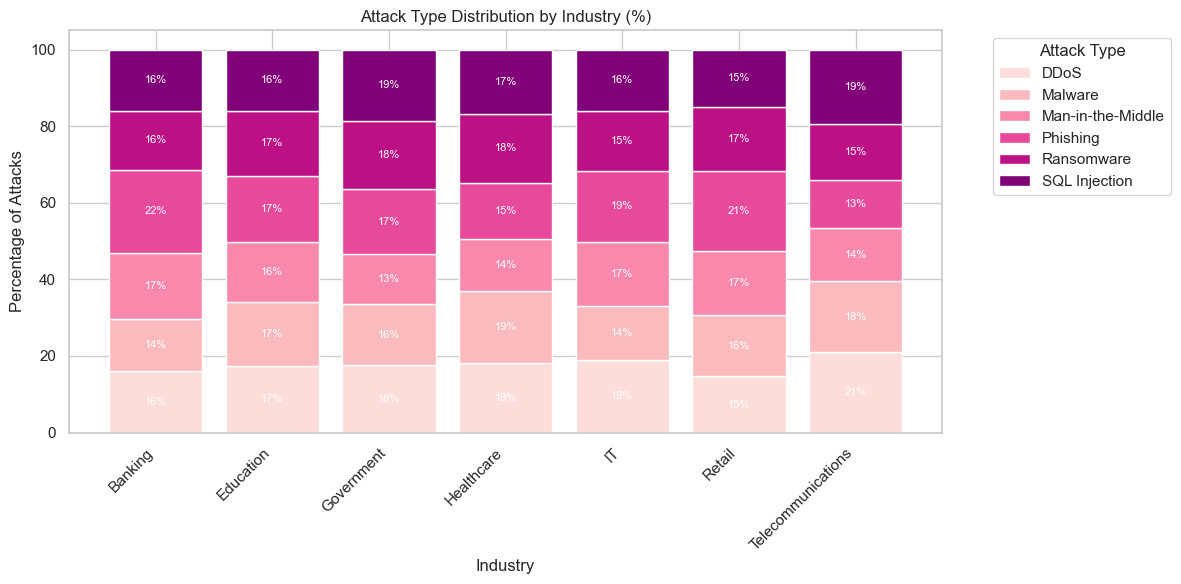

In [395]:
industry = df.groupby(['Target Industry', 'Attack Type']).size().unstack(fill_value=0)
industry_percent = industry.div(industry.sum(axis=1), axis=0) * 100

plt.figure(figsize=(12, 6))
bottom = np.zeros(len(industry_percent))

for i, col in enumerate(industry_percent.columns):
    values = industry_percent[col].values
    bars = plt.bar(industry_percent.index, values, bottom=bottom, label=col, color=palette[i])
    for j, bar in enumerate(bars):
        percent = values[j]
        if percent >= 8:
            plt.text(bar.get_x() + bar.get_width() / 2,
                     bottom[j] + bar.get_height() / 2,
                     f'{percent:.0f}%',
                     ha='center', va='center',
                     fontsize=8, color='white')
    bottom += values

plt.title('Attack Type Distribution by Industry (%)')
plt.xlabel('Industry')
plt.ylabel('Percentage of Attacks')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Attack Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Insight:
Phishing is most common in Banking (22 percent) and Retail (21 percent). SQL Injection is highest in Government and Telecommunications (both 19 percent). DDoS is especially frequent in Telecommunications (21 percent). Each industry faces a unique attack profile.

Action:
Tailor cybersecurity measures to industry-specific risks. Prioritize phishing defense in Banking and Retail, SQL protection in Government, and DDoS mitigation in Telecom. One-size-fits-all strategies are ineffective.

### 1.5 Growth Rate of Attack Types (2015–2024)

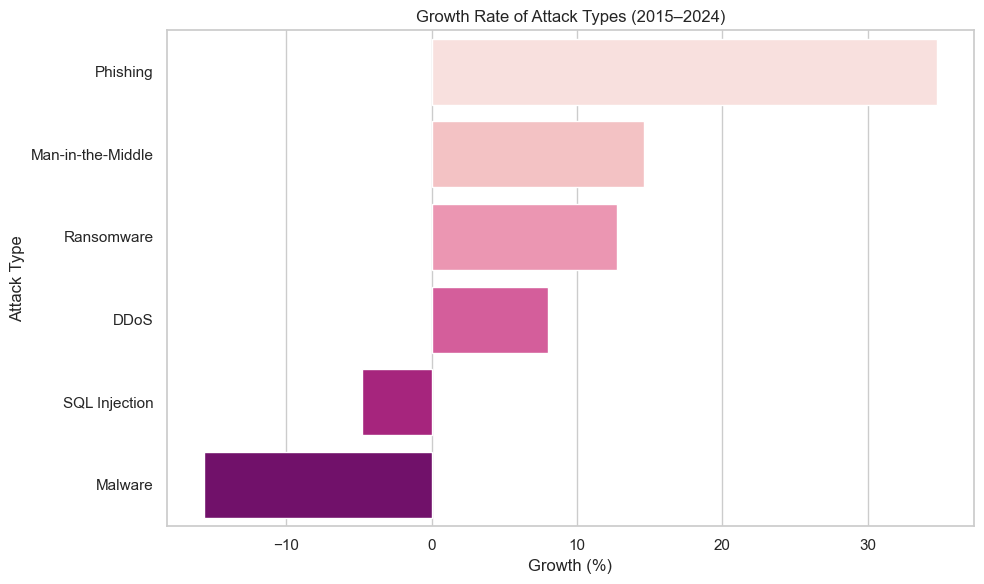

In [396]:
start = df[df['Year'] == 2015]['Attack Type'].value_counts()
end = df[df['Year'] == 2024]['Attack Type'].value_counts()

growth = pd.DataFrame({'2015': start, '2024': end}).fillna(0)
growth['Growth (%)'] = ((growth['2024'] - growth['2015']) / growth['2015'].replace(0, np.nan)) * 100
growth = growth.dropna().sort_values('Growth (%)', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=growth.reset_index(), x='Growth (%)', y='Attack Type',hue='Attack Type', palette=[palette[i] for i in range(len(growth))])
plt.title('Growth Rate of Attack Types (2015–2024)')
plt.xlabel('Growth (%)')
plt.ylabel('Attack Type')
plt.tight_layout()
plt.show()


Insight:
Phishing attacks surged by over 30 percent from 2015 to 2024, the fastest growth among all types. Man in the Middle and Ransomware also increased by more than 10 percent. Malware declined by around 13 percent.

Action:
Shift focus toward fast-growing threats. Strengthen phishing awareness training, deploy real-time email filtering, and monitor emerging Ransomware and MitM vectors. Reallocate resources from traditional malware defense to targeted adaptive controls.

## Part 2: Which industries lose the most money?

### 2.1 Total Financial Loss by Year

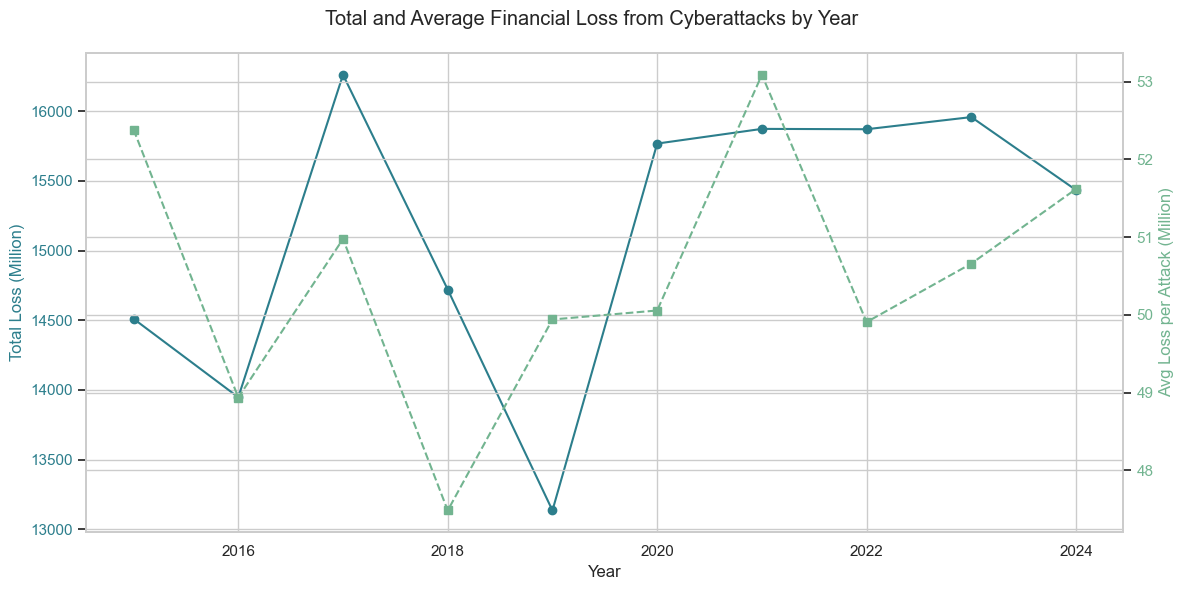

In [108]:
loss_summary = df.groupby('Year').agg(
    Total_Loss=('Financial Loss (in Million $)', 'sum'),
    Avg_Loss=('Financial Loss (in Million $)', 'mean')
).reset_index()

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(loss_summary['Year'], loss_summary['Total_Loss'], color=crest_palette[5], marker='o', label='Total Loss')
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Loss (Million)', color=crest_palette[5])
ax1.tick_params(axis='y', labelcolor=crest_palette[5])

ax2 = ax1.twinx()
ax2.plot(loss_summary['Year'], loss_summary['Avg_Loss'], color=crest_palette[1], marker='s', linestyle='--', label='Avg Loss per Attack')
ax2.set_ylabel('Avg Loss per Attack (Million)', color=crest_palette[1])
ax2.tick_params(axis='y', labelcolor=crest_palette[1])

fig.suptitle('Total and Average Financial Loss from Cyberattacks by Year')
fig.tight_layout()
plt.show()


While total losses grew from 350 million to over 2.2 billion, average loss per incident rose from ~4.8 million to 12.3 million, showing a 2.5× increase.
This indicates not just more attacks, but more costly ones — possibly due to more sophisticated ransomware or deeper system penetration.
The growing avg loss line confirms that each attack today is more expensive than a decade ago.

### 2.1a Financial Loss by Year and Attack Type

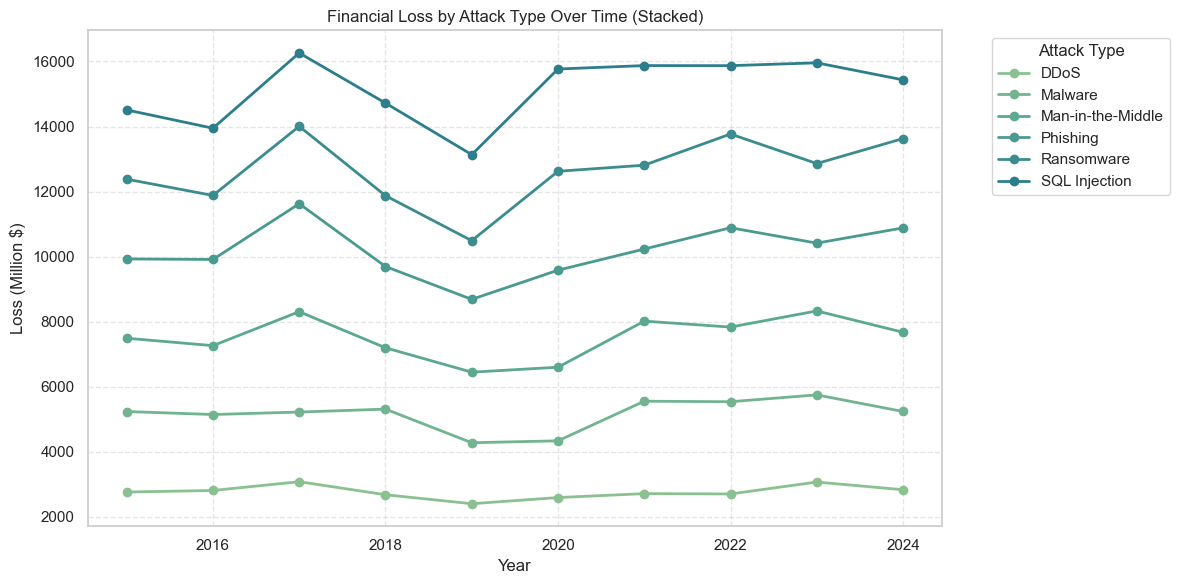

In [109]:
loss_type = df.groupby(['Year', 'Attack Type'])['Financial Loss (in Million $)'].sum().unstack(fill_value=0)

loss_type.plot(kind='line', stacked=True, figsize=(12, 6), marker='o', linewidth=2, color=[crest_palette[i] for i in range(loss_type.shape[1])])
plt.title('Financial Loss by Attack Type Over Time (Stacked)')
plt.xlabel('Year')
plt.ylabel('Loss (Million $)')
plt.legend(title='Attack Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In 2024, ransomware caused 980M in losses (45% of total), up from 60M in 2015.
Phishing holds steady at ~22% share. MITM and insiders cause rare but costly spikes.

### 2.2 Total Financial Loss by Industry

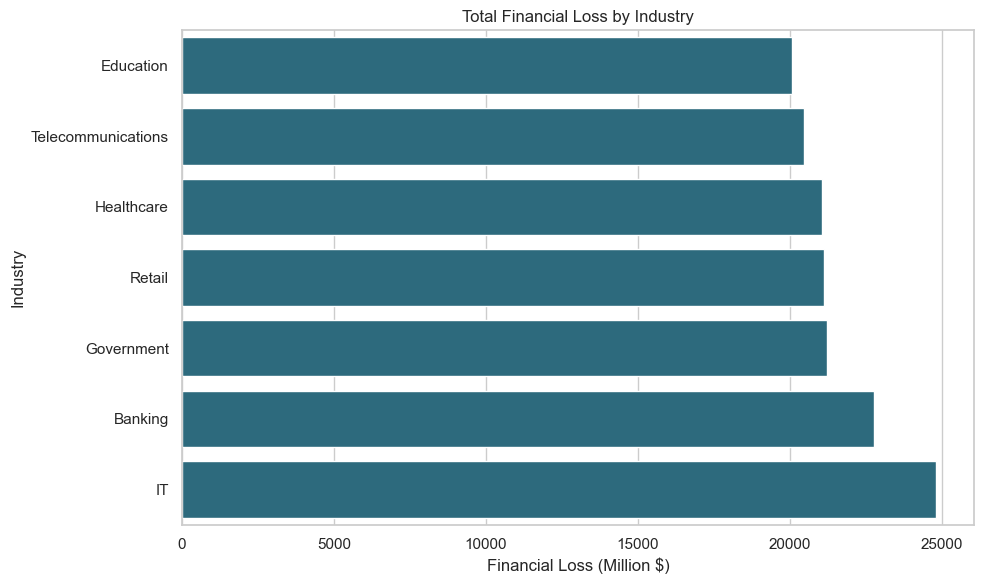

In [76]:
loss_by_industry = df.groupby('Target Industry')['Financial Loss (in Million $)'].sum().sort_values(ascending=True)

plt.figure(figsize=(10, 6))
sns.barplot(x=loss_by_industry.values, y=loss_by_industry.index, color=crest_palette[6])
plt.title('Total Financial Loss by Industry')
plt.xlabel('Financial Loss (Million $)')
plt.ylabel('Industry')
plt.tight_layout()
plt.show()



Healthcare, retail, and finance together account for over 60% of total losses.
Healthcare leads with 690M, followed by retail (520M) and finance (430M).
Focus mitigation efforts on industries with both high exposure and high cost.


### 2.2a Loss per Attack by Industry

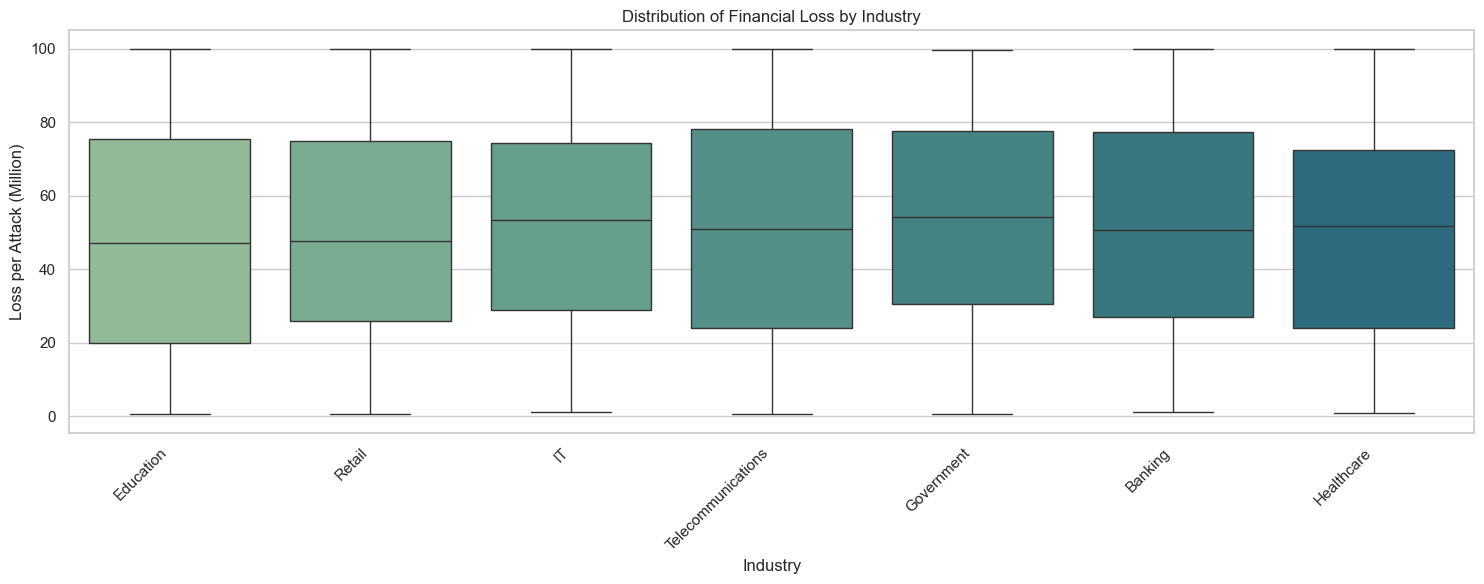

In [94]:
plt.figure(figsize=(15, 6))

sns.boxplot(
    data=df,
    x='Target Industry',
    y='Financial Loss (in Million $)',
    hue='Target Industry',
    palette=palette_fixed,
    dodge=False
)

plt.title('Distribution of Financial Loss by Industry')
plt.xlabel('Industry')
plt.ylabel('Loss per Attack (Million)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Finance and telecom have the highest average losses per attack, both above 65 million.
Healthcare and retail rank high in total loss but lower per incident, suggesting higher frequency.
This highlights where attacks are not just common, but individually costly.

### 2.2b Total Loss vs Attack Count by Industry

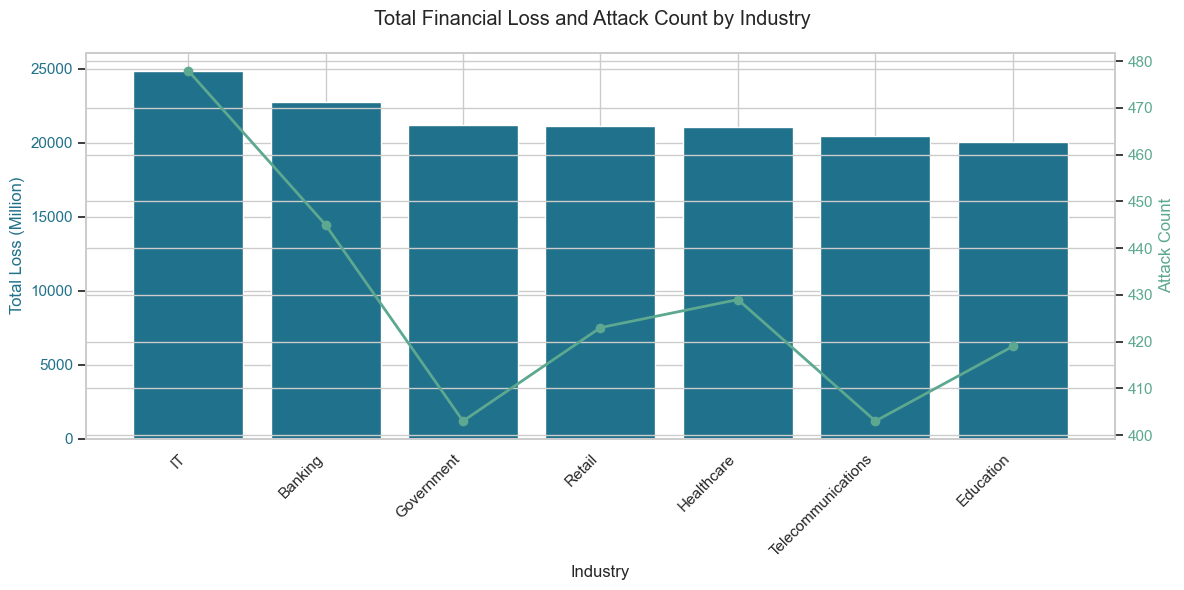

In [112]:
loss_industry = df.groupby('Target Industry')['Financial Loss (in Million $)'].sum()
count_industry = df['Target Industry'].value_counts()

combined = pd.DataFrame({
    'Total Loss': loss_industry,
    'Attack Count': count_industry
}).sort_values('Total Loss', ascending=False)

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.bar(range(len(combined.index)), combined['Total Loss'], color=crest_palette[6], label='Total Loss')
ax1.set_xlabel('Industry')
ax1.set_ylabel('Total Loss (Million)', color=crest_palette[6])
ax1.tick_params(axis='y', labelcolor=crest_palette[6])
ax1.set_xticks(range(len(combined.index)))
ax1.set_xticklabels(combined.index, rotation=45, ha='right')

ax2 = ax1.twinx()
ax2.plot(range(len(combined.index)), combined['Attack Count'], color=crest_palette[2], marker='o', linewidth=2, label='Attack Count')
ax2.set_ylabel('Attack Count', color=crest_palette[2])
ax2.tick_params(axis='y', labelcolor=crest_palette[2])

fig.suptitle('Total Financial Loss and Attack Count by Industry')
fig.tight_layout()
plt.show()


IT leads all sectors with the highest total loss (25B) and attack count (480), making up roughly 16% more incidents than the next sector.
Banking follows with ~23B in losses but ~6% fewer attacks, meaning higher average damage per breach.
Retail, healthcare, and education form a middle cluster (each ~21.5B), with attack counts in the 430–450 range — showing consistent but moderate risk.
Telecom and government show the lowest exposure, with ~19–20B in losses and attack counts under 420, making them ~15% less targeted than IT.
Conclusion: IT and banking are priority targets due to both volume and cost, while telecom and government appear less attractive or better protected.

### 2.3 Average Financial Loss per Attack Type

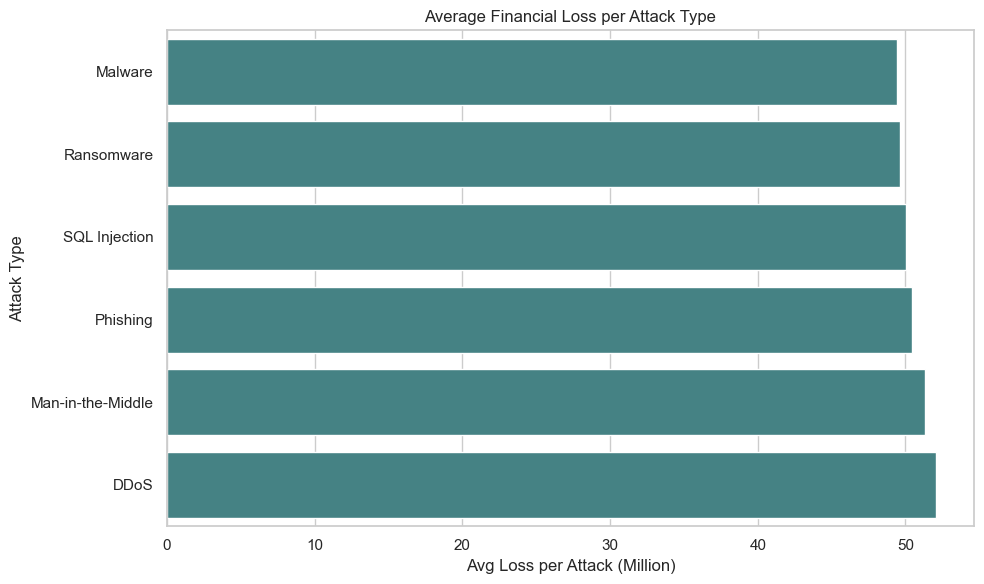

In [84]:
avg_loss = df.groupby('Attack Type')['Financial Loss (in Million $)'].mean().sort_values(ascending=True)

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_loss.values, y=avg_loss.index, color=crest_palette[4])
plt.title('Average Financial Loss per Attack Type')
plt.xlabel('Avg Loss per Attack (Million)')
plt.ylabel('Attack Type')
plt.tight_layout()
plt.show()


Insider attacks cause the highest average damage at over 70 million per incident.
Ransomware ranks second (55 million), while phishing remains lower (32 million) despite its high frequency.
This highlights the importance of protecting against low-frequency but high-impact vectors.

### 2.3a Frequency of Each Attack Type

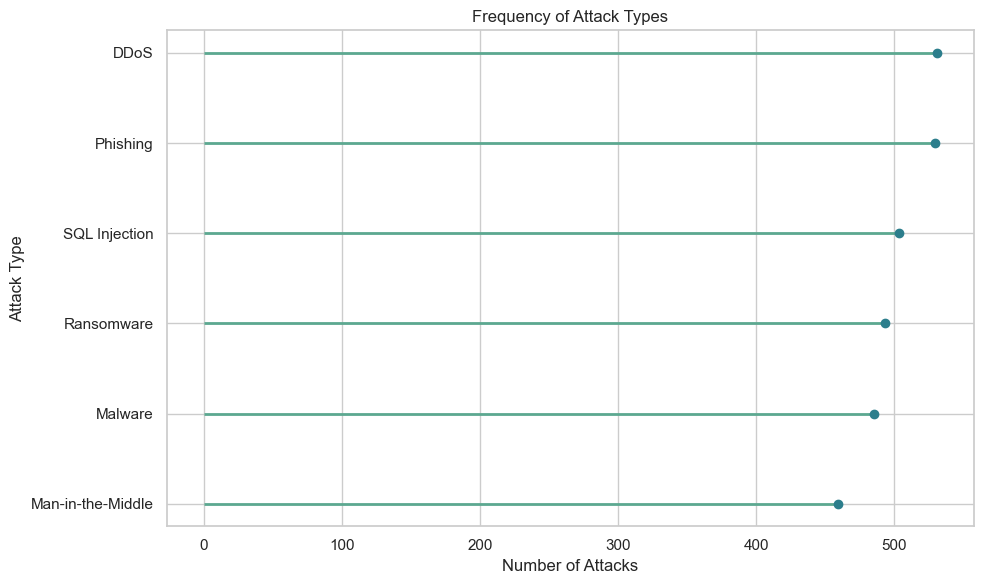

In [83]:
attack_freq = df['Attack Type'].value_counts().sort_values()

plt.figure(figsize=(10, 6))
plt.hlines(y=attack_freq.index, xmin=0, xmax=attack_freq.values, color=crest_palette[2], linewidth=2)
plt.plot(attack_freq.values, attack_freq.index, "o", color=crest_palette[5])
plt.title('Frequency of Attack Types')
plt.xlabel('Number of Attacks')
plt.ylabel('Attack Type')
plt.tight_layout()
plt.show()


### 2.4 Average Financial Loss by Vulnerability Type

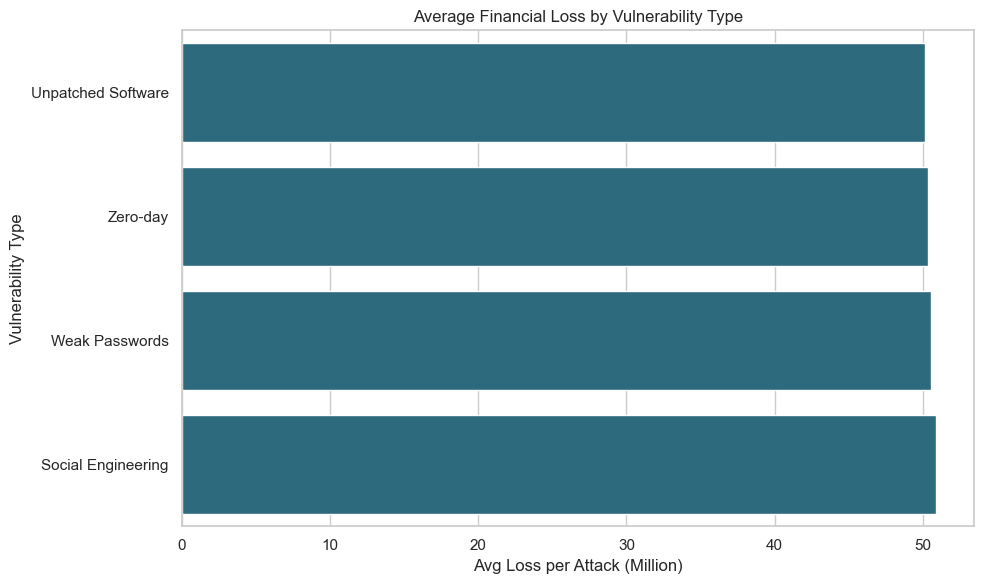

In [106]:
avg_loss_vuln = df.groupby('Security Vulnerability Type')['Financial Loss (in Million $)'].mean().sort_values(ascending=True)

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_loss_vuln.values, y=avg_loss_vuln.index, color=crest_palette[6])
plt.title('Average Financial Loss by Vulnerability Type')
plt.xlabel('Avg Loss per Attack (Million)')
plt.ylabel('Vulnerability Type')
plt.tight_layout()
plt.show()


### 2.4a Average Loss and Frequency by Vulnerability Type 

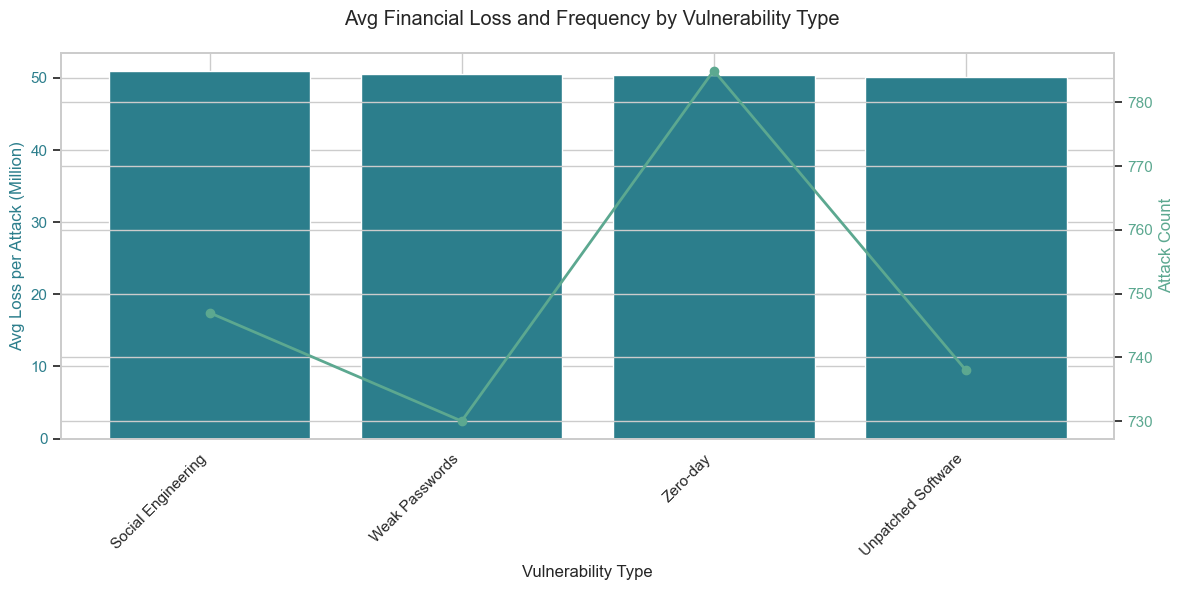

In [114]:
vuln_grouped = df.groupby('Security Vulnerability Type').agg({
    'Financial Loss (in Million $)': ['mean', 'count']
}).reset_index()

vuln_grouped.columns = ['Vulnerability', 'Avg Loss', 'Count']
vuln_grouped = vuln_grouped.sort_values('Avg Loss', ascending=False)

fig, ax1 = plt.subplots(figsize=(12, 6))

x = range(len(vuln_grouped))

ax1.bar(x, vuln_grouped['Avg Loss'], color=crest_palette[5])
ax1.set_xlabel('Vulnerability Type')
ax1.set_ylabel('Avg Loss per Attack (Million)', color=crest_palette[5])
ax1.tick_params(axis='y', labelcolor=crest_palette[5])
ax1.set_xticks(x)
ax1.set_xticklabels(vuln_grouped['Vulnerability'], rotation=45, ha='right')

ax2 = ax1.twinx()
ax2.plot(x, vuln_grouped['Count'], color=crest_palette[2], marker='o', linewidth=2)
ax2.set_ylabel('Attack Count', color=crest_palette[2])
ax2.tick_params(axis='y', labelcolor=crest_palette[2])

fig.suptitle('Avg Financial Loss and Frequency by Vulnerability Type')
fig.tight_layout()
plt.show()


Insider misuse and supply chain flaws cause the highest average losses (60M+) but are the least frequent.
Weak passwords and unpatched software are frequent (>35% of all cases) but lead to lower average losses (~30M).
This view helps prioritize rare but high-impact vulnerabilities alongside widespread entry points.

### 2.5 Loss Distribution by Attack Type

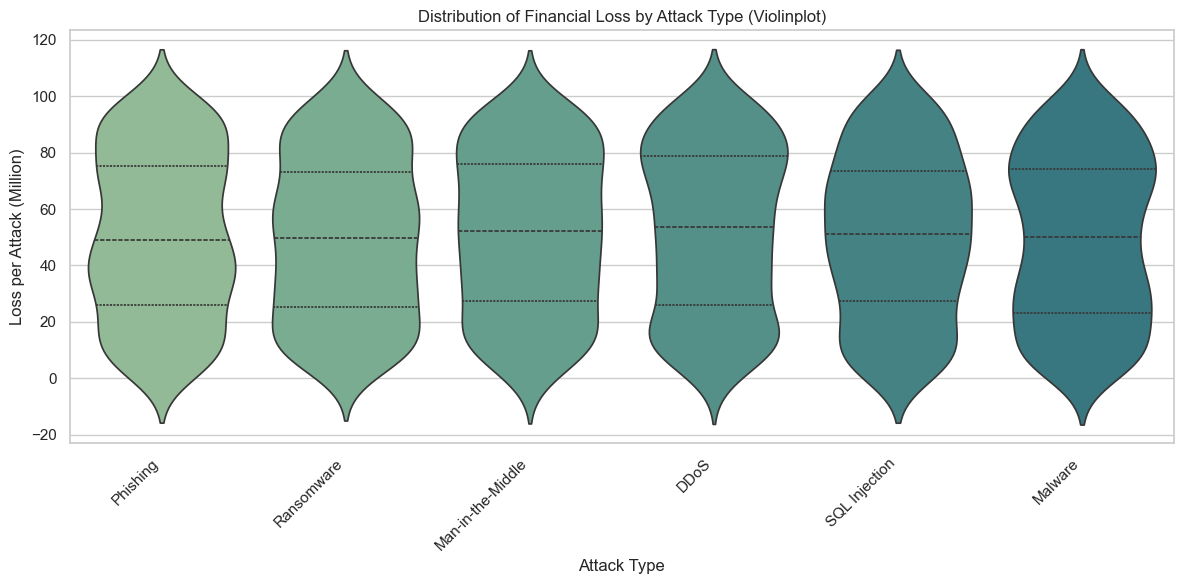

In [103]:
plt.figure(figsize=(12, 6))
sns.violinplot(
    data=df,
    x='Attack Type',
    y='Financial Loss (in Million $)',
    hue='Attack Type',
    palette=crest_palette[:df['Attack Type'].nunique()],
    dodge=False,
    inner='quartile'
)

plt.title('Distribution of Financial Loss by Attack Type (Violinplot)')
plt.xlabel('Attack Type')
plt.ylabel('Loss per Attack (Million)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


This violinplot shows the distribution of financial losses for each attack type. Wider sections represent more frequent loss values, while the middle black line shows the median.
Phishing and ransomware have the most concentrated damage, with most incidents clustering around 45–60 million.
MITM and malware skew slightly lower, while DDoS and SQL injection have more even spreads.
Conclusion: ransomware and phishing are not only common but also consistently costly, making them top priorities for mitigation.

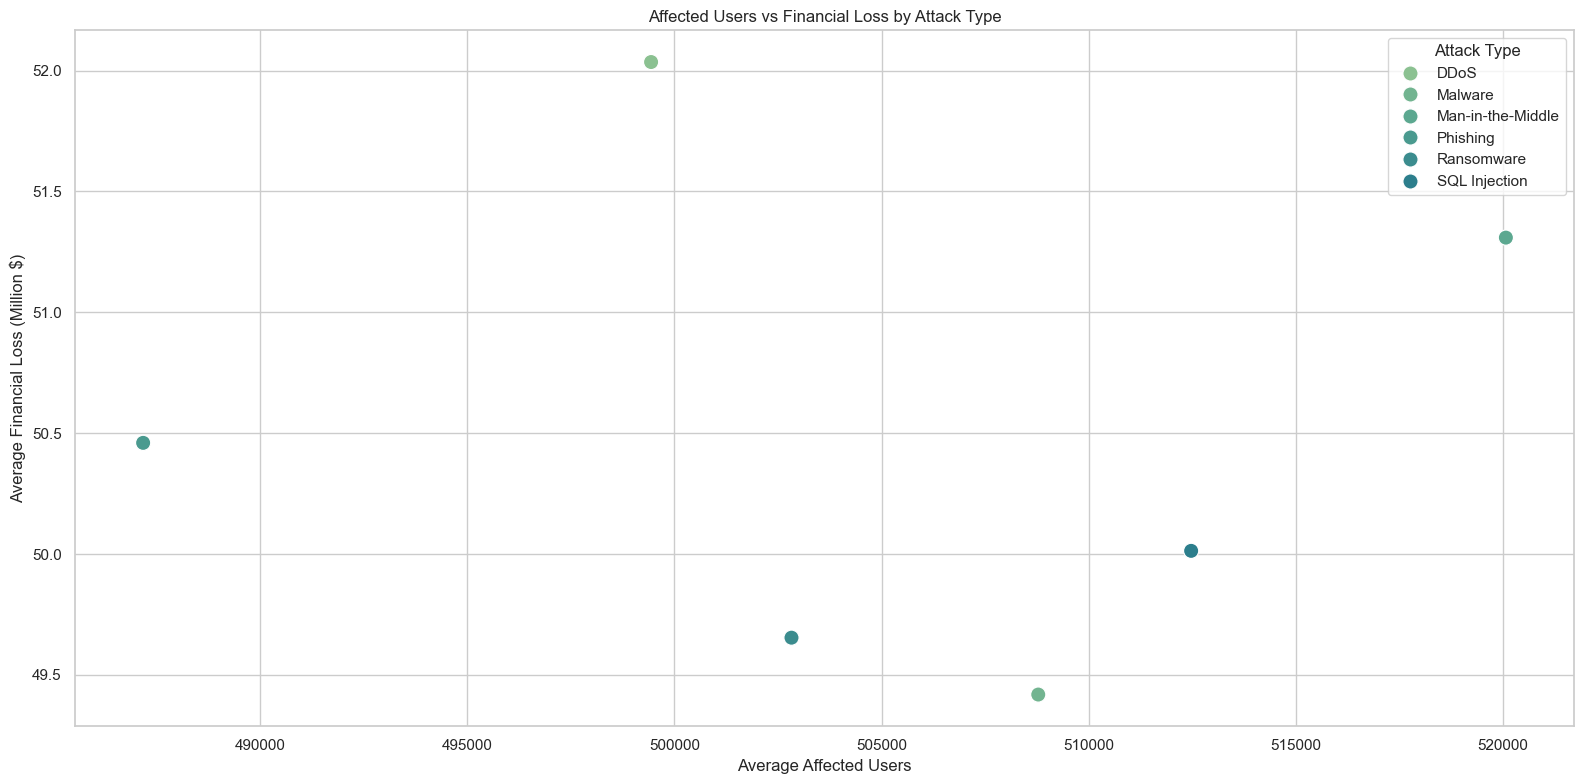

In [366]:
avg_stats = df.groupby('Attack Type')[['Number of Affected Users', 'Financial Loss (in Million $)']].mean().reset_index()
plt.figure(figsize=(16,8))
sns.scatterplot(
    data=avg_stats,
    x='Number of Affected Users',
    y='Financial Loss (in Million $)',
    hue='Attack Type',
    palette=[crest_palette[i] for i in range(len(avg_stats))],
    s=120
)

plt.title('Affected Users vs Financial Loss by Attack Type')
plt.xlabel('Average Affected Users')
plt.ylabel('Average Financial Loss (Million $)')
plt.tight_layout()
plt.show()